In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)


NameError: name 'tf' is not defined

In [12]:
import pathlib
data_dir = pathlib.Path('C:/Users/Rohan/OneDrive/Desktop/dl/flower prediction/flower_photos')
print(data_dir)

C:\Users\Rohan\OneDrive\Desktop\dl\flower prediction\flower_photos


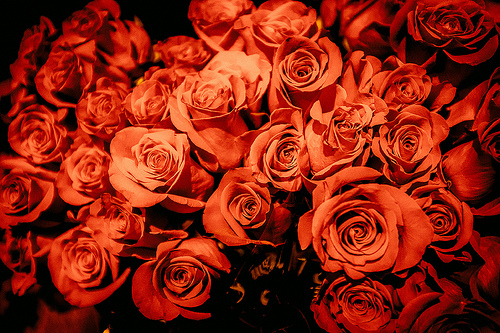

In [13]:
roses = list(data_dir.glob('roses/*')) 
PIL.Image.open(str(roses[2]))

In [14]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [19]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.Dense(5, activation='softmax'))

In [24]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
epochs=5
resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 670ms/step - accuracy: 0.9438 - loss: 0.1679 - val_accuracy: 0.8556 - val_loss: 0.4171
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 63s 680ms/step - accuracy: 0.9516 - loss: 0.1332 - val_accuracy: 0.8719 - val_loss: 0.3815
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 677ms/step - accuracy: 0.9816 - loss: 0.0692 - val_accuracy: 0.8774 - val_loss: 0.3766
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 64s 696ms/step - accuracy: 0.9956 - loss: 0.0320 - val_accuracy: 0.8760 - val_loss: 0.3802
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 677ms/step - accuracy: 0.9983 - loss: 0.0205 - val_accuracy: 0.8801 - val_loss: 0.3890


In [27]:
resnet_model.evaluate(val_ds)


23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 495ms/step - accuracy: 0.8801 - loss: 0.3890


[0.388988196849823, 0.8801090121269226]

In [28]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [29]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[4.2573764e-04 1.5185486e-06 9.9463671e-01 2.0056953e-07 4.9358727e-03]]


In [30]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses


In [31]:
resnet_model.save('resnet_model.h5')